## Co-relation clustering along with and without the link Predicition!

Set complete_graph = False everywhere, if want to run the experiments without predicting the unknown link weights and assuming those relations to be neutral.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from correlation import c_clustering
from collections import defaultdict

In [131]:
import networkx as nx
from tqdm import trange
from fairness_goodness_computation import *
import csv 

In [132]:
# Loading Dataset
Data = open('soc-sign-bitcoinotc.csv', "r")
next(Data, None)  # skip the first line
graph_type = nx.DiGraph()
df = pd.read_csv("soc-sign-bitcoinotc.csv")
df = df.sort_values(by = "Timestamp")
# Reducing weights to -1 to 1 range:
df.Weight /= 10
df.Weight = df.Weight - df.Weight.mean() # Setting the mean to zero![Want more negative edges!!]
print(df.head())
split = int(0.1*len(df)) # USing first 10% data for the initial experimentation
train = df.iloc[:split,:]
test = df.iloc[split:,:]
G = nx.from_pandas_edgelist(train,
                            source='Source',
                            target='Target',
                            edge_attr='Weight',
                            create_using=graph_type)
H = G.copy()

   Source  Target    Weight   Timestamp
0       6       2  0.298797  1289241912
1       6       5  0.098797  1289241942
2       1      15 -0.001203  1289243140
3       4       3  0.598797  1289245277
4      13      16  0.698797  1289254254


In [133]:
######## For extensive no. of negative edges in the subgraph!
# H = G.subgraph(list(G.nodes)[:200])
# nodes = []
# WW = nx.get_edge_attributes(G,"Weight")
# count = 0
# for i in (G.edges):
#     if(WW[i] < 0):
#         nodes.append(i[0])
#         nodes.append(i[1])
#         count+=2
#     if(count == 1800):
#         break
# H = G.subgraph(nodes)
# nx.info(H)

In [134]:
## Here, Hdash is the disrupted network created removing the best cluster community! 
#---------- UNCOMMENT WHEN WORKING ON THE RESILIENCY PROBLEM ---------- #
# H = Hdash.copy()

In [135]:
print(nx.info(H))

Name: 
Type: DiGraph
Number of nodes: 817
Number of edges: 3559
Average in degree:   4.3562
Average out degree:   4.3562


In [136]:
# Computes Fairness and Goodness!
fairness, goodness = compute_fairness_goodness(H)
nx.set_node_attributes(H,fairness,"fairness")
nx.set_node_attributes(H,goodness,"goodness")

-----------------
Iteration number 0
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 36.32, 0.00
-----------------
Iteration number 1
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 2.35, 4.69
-----------------
Iteration number 2
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.10, 0.25
-----------------
Iteration number 3
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.01, 0.02
-----------------
Iteration number 4
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.00, 0.00
-----------------
Iteration number 5
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.00, 0.00
-----------------
Iteration number 6
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.00, 0.00
-----------------
Iteration number 7
Updating goodness

In [137]:
## Corelation Clustering Begins
CC = c_clustering(H.copy(), delta = 1/155, complete_graph = True)

In [138]:
clusters = CC.run()
print(len(clusters))

CLUSTER:  39
CLUSTER:  536
CLUSTER:  6
CLUSTER:  1
CLUSTER:  10
CLUSTER:  5
CLUSTER:  9
CLUSTER:  1
CLUSTER:  1
CLUSTER:  29
CLUSTER:  2
CLUSTER:  27
CLUSTER:  1
CLUSTER:  1
CLUSTER:  9
CLUSTER:  1
CLUSTER:  17
CLUSTER:  1
CLUSTER:  13
CLUSTER:  1
CLUSTER:  18
CLUSTER:  2
CLUSTER:  7
CLUSTER:  40
CLUSTER:  1
CLUSTER:  20
45


In [139]:
dic = dict(zip(range(len(clusters)), clusters))

In [140]:
# Helper function for Plotting the clusters --- Idea taken from a stack overflow post
import numpy as np
pos = nx.circular_layout(H)
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(dic.keys()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    posx = 0
    for i in dic.keys():
        if(ea in dic[i]):
            posx = i
    pos[ea] += repos[posx]

In [141]:
nodes_dic = {}
for u in dic.keys():
    v = dic[u]
    for i in v:
        nodes_dic[i] = u    

{2: Text(4.4659086766916865, 0.49479633518714283, '0'),
 3: Text(4.464873820849035, 0.5332328266974471, '0'),
 4: Text(4.465199023790948, 0.5255491621366758, '0'),
 5: Text(4.465819925375611, 0.502486362078083, '0'),
 6: Text(4.465938240595497, 0.48710585381078625, '0'),
 8: Text(4.460944682665209, 0.5869166329113703, '0'),
 9: Text(4.416637689178098, 0.17699209594375254, '0'),
 10: Text(4.463543862410083, 0.5562656148860712, '0'),
 15: Text(4.465465098925241, 0.5178632307367579, '0'),
 16: Text(4.46404621035628, 0.5485915056949161, '0'),
 17: Text(4.460147649355226, 0.5945657565804922, '0'),
 19: Text(4.441170841759807, 0.7082876935283476, '0'),
 20: Text(4.461682826586151, 0.5792616009318347, '0'),
 21: Text(4.462362140722696, 0.5716011151273018, '0'),
 23: Text(4.45929184586549, 0.6022085249043645, '0'),
 25: Text(4.458377272196002, 0.6098444908481515, '0'),
 26: Text(4.457403987951408, 0.6174732073770172, '0'),
 28: Text(4.456372112340995, 0.6250941827526422, '0'),
 31: Text(4.4541

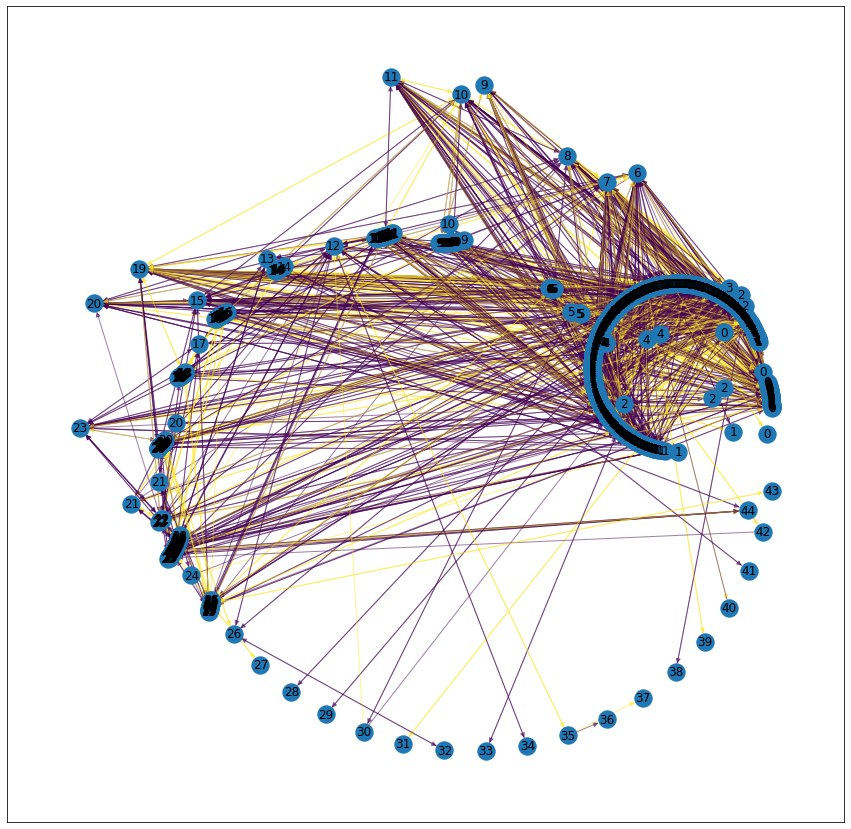

In [142]:
# See the clustering here!
colos = list((np.array(list(nx.get_edge_attributes(H,"Weight").values()) ) > 0).astype(int))
plt.figure(figsize = (15,15))
nx.draw_networkx_nodes(H, pos = pos)
nx.draw_networkx_edges(H, pos = pos, width=1.0, alpha=0.5, edge_color = colos)#, edge_cmap = plt.cm.binary)
nx.draw_networkx_labels(H, labels = nodes_dic, pos = pos)
# nx.draw_networkx_labels(H, labels = dict(zip(list(H.nodes), list(H.nodes))), pos = pos)

# Metrics Calculations:

In [143]:
complte_graph = True
weights = nx.get_edge_attributes(H,"Weight")
inside_p = defaultdict(int)
outside_p = defaultdict(int)
inside_n = defaultdict(int)
outside_n = defaultdict(int)
N_inside_p = defaultdict(int)
N_outside_p = defaultdict(int)
N_inside_n = defaultdict(int)
N_outside_n = defaultdict(int)
for i in range(len(clusters)):
    for u in clusters[i]:
        for v in H.neighbors(u):
            if(v in clusters[i]):
                if(weights[(u,v)] > 0):
                    inside_p[i] += weights[(u,v)]
                    N_inside_p[i]+=1
                else:
                    inside_n[i] += weights[(u,v)]
                    N_inside_n[i]+=1
            else:
                if(weights[(u,v)] > 0):
                    outside_p[i] += weights[(u,v)]
                    N_outside_p[i]+=1
                else:
                    outside_n[i] += weights[(u,v)]
                    N_outside_n[i]+=1
        if(complte_graph):
            for v in nx.non_neighbors(H, u):
                if(v in clusters[i]):
                    if(fairness[u]*goodness[v] > 0):
                        inside_p[i] += fairness[u]*goodness[v]
                        N_inside_p[i]+=1
                    else:
                        inside_n[i] += fairness[u]*goodness[v]
                        N_inside_n[i]+=1
                else:
                    if(fairness[u]*goodness[v] > 0):
                        outside_p[i] += fairness[u]*goodness[v]
                        N_outside_p[i]+=1
                    else:
                        outside_n[i] += fairness[u]*goodness[v]
                        N_outside_n[i]+=1


In [144]:
print(N_inside_p)
print(N_inside_n)
print(N_outside_p)
print(N_outside_n)

defaultdict(<class 'int'>, {0: 1234, 1: 166849, 2: 22, 4: 72, 5: 12, 6: 54, 9: 308, 10: 1, 11: 336, 14: 40, 16: 111, 18: 72, 20: 119, 21: 1, 22: 24, 23: 428, 25: 133})
defaultdict(<class 'int'>, {0: 248, 1: 119911, 2: 8, 4: 18, 5: 8, 6: 18, 9: 504, 10: 1, 11: 366, 14: 32, 16: 161, 18: 84, 20: 187, 21: 1, 22: 18, 23: 1132, 25: 247})
defaultdict(<class 'int'>, {0: 16505, 1: 77306, 2: 2660, 3: 449, 4: 4488, 5: 2255, 6: 4018, 7: 424, 8: 442, 9: 12927, 10: 889, 11: 11972, 12: 448, 13: 455, 14: 4074, 15: 441, 16: 7657, 17: 454, 18: 5871, 19: 434, 20: 8087, 21: 911, 22: 3165, 23: 17837, 24: 457, 25: 9013, 26: 455, 27: 457, 28: 457, 29: 457, 30: 457, 31: 457, 32: 457, 33: 457, 34: 457, 35: 457, 36: 458, 37: 457, 38: 457, 39: 457, 40: 456, 41: 457, 42: 457, 43: 457, 44: 456})
defaultdict(<class 'int'>, {0: 13837, 1: 73310, 2: 2206, 3: 367, 4: 3582, 5: 1805, 6: 3254, 7: 392, 8: 374, 9: 9925, 10: 741, 11: 9358, 12: 368, 13: 361, 14: 3198, 15: 375, 16: 5943, 17: 362, 18: 4581, 19: 382, 20: 6295, 2

In [145]:
outdegs = defaultdict(int)
for i in range(len(clusters)):
    for u in clusters[i]:
        outdegs[i]+=H.out_degree(u)
# outdegs

In [146]:
metrics = [(inside_p[i]+abs(outside_n[i]))/len(clusters[i]) for i in range(len(clusters))]
print(metrics)
sum(metrics) # Trust of the entire Network!

[10.432616760774586, 38.41769683230437, 5.670212546063521, 4.9664644085967105, 5.831601738289799, 5.461226536965218, 6.046886542013446, 5.314481690401441, 5.3109053903736285, 5.695875400087232, 5.279777789585106, 6.503088190762936, 5.357816801845862, 5.390761885961625, 6.0970175088832805, 5.351049119424359, 6.418313472130027, 5.334994976450546, 6.312975650164542, 4.560571350551328, 5.294396766744445, 5.402545235375241, 5.468396209857828, 7.043773168795937, 5.289008892160612, 7.115352816910975, 4.973970144786375, 5.2974581208671205, 4.999711599581657, 5.291484253161125, 5.302674441524413, 5.312255027963747, 4.892414136490091, 5.327233083222685, 5.3822106805418795, 5.357975500429351, 5.43166306887126, 5.432849006353617, 5.358528504197254, 5.389048374436876, 5.206209705372274, 5.3822106805418795, 5.391767313999997, 5.2974581208671205, 5.403494340788132]


285.79842378547147

In [147]:
metrics_2 = [(inside_p[i]+abs(outside_n[i]))/(N_inside_p[i] + N_inside_n[i] + N_outside_p[i] + N_outside_n[i]) for i in range(len(clusters))]
print(metrics_2)
sum(metrics_2) # Trust of the entire Network!

[0.012785069559772776, 0.04708051082390242, 0.0069487898848817654, 0.006086353441907734, 0.007146570757708087, 0.006692679579614238, 0.007410400174036086, 0.006512845208825295, 0.006508462488202976, 0.006980239460891216, 0.006470315918609198, 0.007969470822013403, 0.0065659519630464, 0.006606325840639246, 0.007471835182455001, 0.006557658234588675, 0.007865580235453465, 0.006537984039767826, 0.007736489767358508, 0.005588935478616823, 0.006488231331794662, 0.0066207662198225995, 0.006701465943453221, 0.008632074961759727, 0.006481628544314475, 0.00871979511876345, 0.006095551648022519, 0.0064919829912587265, 0.006127097548506932, 0.006484662074952359, 0.00649837554108384, 0.006510116455837925, 0.0059956055594241305, 0.006528471915714075, 0.006595846422232696, 0.006566146446604597, 0.006656449839303015, 0.006657903194060805, 0.006566824147300557, 0.006604225949064799, 0.006380158952662101, 0.006595846422232696, 0.006607557982843134, 0.0064919829912587265, 0.006621929339201142]


0.350243166403764

In [148]:
pd.DataFrame(zip(range(len(clusters)), [len(clusters[i]) for i in range(len(clusters))], [N_inside_p[i] for i in range(len(clusters))], [N_outside_n[i] for i in range(len(clusters))], metrics_2)).sort_values(by = 4,ascending = False)

,0,1,2,3,4
1,1,536,166849,73310,0.047081
0,0,39,1234,13837,0.012785
25,25,20,133,6927,0.008720
23,23,40,428,13243,0.008632
11,11,27,336,9358,0.007969
16,16,17,111,5943,0.007866
18,18,13,72,4581,0.007736
14,14,9,40,3198,0.007472
6,6,9,54,3254,0.007410
4,4,10,72,3582,0.007147


# Removing the most Trusted Community in the Network!
{The one with the highest metric value!}

In [149]:
Best_Community = clusters[metrics.index(max(metrics))]
Hdash = H.subgraph(set(H.nodes) - Best_Community) # Removing Best community from the network!

In [150]:
nx.info(Hdash)

'Name: \nType: DiGraph\nNumber of nodes: 281\nNumber of edges: 657\nAverage in degree:   2.3381\nAverage out degree:   2.3381'

### Now simply re-run the entire link-prediction and co-relation clustering pipeline over this disrupted network! Results look great!